# Churn data analysis

Submitted by:
<br>Nabila Tajrin Bristy
<br>Dhaka, Bangladesh

#### Objectives
- Decision Tree Classification
- Cross-Validation
- Grid Search
- Confusion Matrix, Classification report, and ROC-AUC
- accuracy, precision, recall, f1 score

#### Tasks
1. Load the dataset and perform data preprocessing
2. Which approach works better for this dataset? A. One-hot Encoding or B. Label Encoding
3. Perform Data Transformation (StandardScaler or MinMaxScaler). Does Data Transformation improve model performance? Is it necessary to standardize or normalize data for tree-based machine learning models?
4. Perform Grid Search and Cross-Validation with Decision Tree Classifier
5. Show a tree diagram of the Decision Tree
6. Show the Confusion Matrix, Classification report, and ROC-AUC
7. Explain accuracy, precision, recall, f1 score


#### References
dataset: https://github.com/SKawsar/machine_learning_with_python/blob/main/Churn.csv <br>
Actual dataset source: https://learn.datacamp.com/courses/marketing-analytics-predicting-customer-churn-in-python

### Import required libraries and packages

In [214]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score

from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset and perform data preprocessing

In [215]:
df = pd.read_csv("Churn.csv", na_values="?")
df = df.dropna()
display(df.head())
print(df.shape)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


(3333, 21)


#### Exploratory Data Analysis

In [216]:
df.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


#### Checking categorical variables

In [217]:
df.Churn.replace(('yes', 'no'), (1, 0), inplace=True)

In [218]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [219]:
df['Intl_Plan'].value_counts()

no     3010
yes     323
Name: Intl_Plan, dtype: int64

In [220]:
df['Vmail_Plan'].value_counts()

no     2411
yes     922
Name: Vmail_Plan, dtype: int64

## Checking for missing values and data types

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 21 columns):
Account_Length    3333 non-null int64
Vmail_Message     3333 non-null int64
Day_Mins          3333 non-null float64
Eve_Mins          3333 non-null float64
Night_Mins        3333 non-null float64
Intl_Mins         3333 non-null float64
CustServ_Calls    3333 non-null int64
Churn             3333 non-null int64
Intl_Plan         3333 non-null object
Vmail_Plan        3333 non-null object
Day_Calls         3333 non-null int64
Day_Charge        3333 non-null float64
Eve_Calls         3333 non-null int64
Eve_Charge        3333 non-null float64
Night_Calls       3333 non-null int64
Night_Charge      3333 non-null float64
Intl_Calls        3333 non-null int64
Intl_Charge       3333 non-null float64
State             3333 non-null object
Area_Code         3333 non-null int64
Phone             3333 non-null object
dtypes: float64(8), int64(9), object(4)
memory usage: 572.9+ KB


#### Target variable: 'Churn'

In [222]:
print(df['Churn'].value_counts())

0    2850
1     483
Name: Churn, dtype: int64


In [223]:
display(df.describe())

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.144914,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.352067,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


#### Create feature set and target

In [224]:
X = df.drop('Churn', axis=1)
y = df[['Churn']]

print(X.shape, y.shape)

(3333, 20) (3333, 1)


## One-hot encoding

In [225]:
X = pd.get_dummies(X, columns=['Intl_Plan', 'Vmail_Plan', 'State', 'Phone'], drop_first=True)

display(X.head())
print(X.shape)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,...,Phone_422-5350,Phone_422-5865,Phone_422-5874,Phone_422-6685,Phone_422-6690,Phone_422-7728,Phone_422-8268,Phone_422-8333,Phone_422-8344,Phone_422-9964
0,128,25,265.1,197.4,244.7,10.0,1,110,45.07,99,...,0,0,0,0,0,0,0,0,0,0
1,107,26,161.6,195.5,254.4,13.7,1,123,27.47,103,...,0,0,0,0,0,0,0,0,0,0
2,137,0,243.4,121.2,162.6,12.2,0,114,41.38,110,...,0,0,0,0,0,0,0,0,0,0
3,84,0,299.4,61.9,196.9,6.6,2,71,50.90,88,...,0,0,0,0,0,0,0,0,0,0
4,75,0,166.7,148.3,186.9,10.1,3,113,28.34,122,...,0,0,0,0,0,0,0,0,0,0


(3333, 3400)


## Split the dataset intro train and test set

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2666, 3400) (667, 3400) (2666, 1) (667, 1)


## Perform Grid Search and Cross-Validation with Decision Tree Classifier

In [227]:
model_DT = DecisionTreeClassifier(random_state = 42)
model_DT = model_DT.fit(X_train, y_train)

## Tree diagram of the Decision Tree

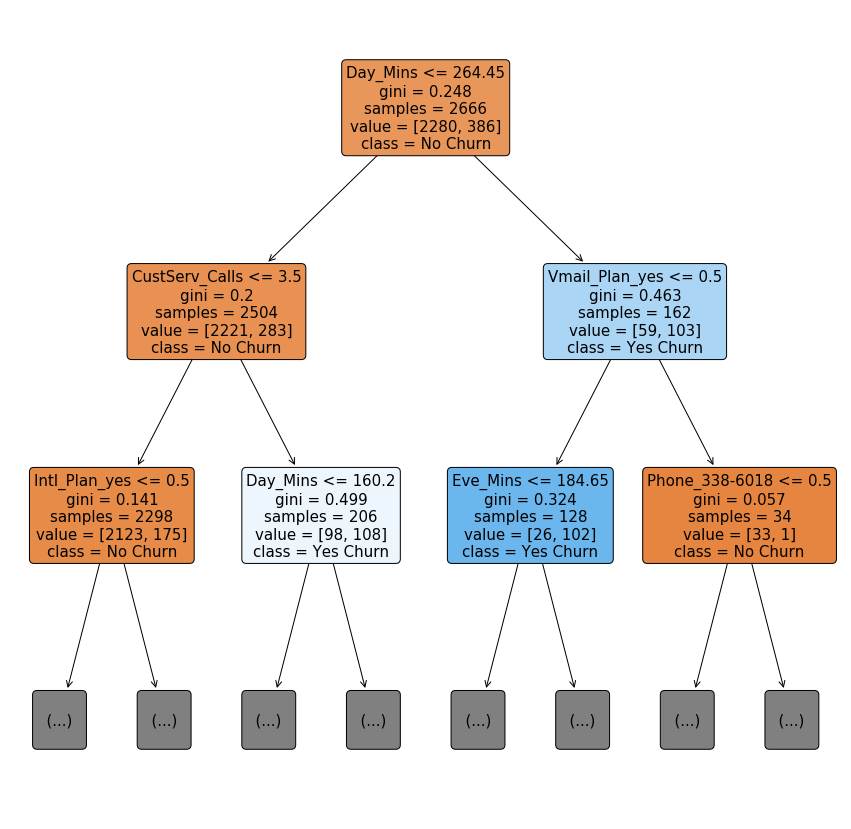

In [228]:
plt.figure(figsize = (15, 15))
plot_tree(model_DT, 
          filled=True,
          rounded=True,
          class_names = ["No Churn", "Yes Churn"],
          feature_names = X.columns,
          max_depth=2, 
          fontsize=15)

plt.show()

## Model Performance Evaluation

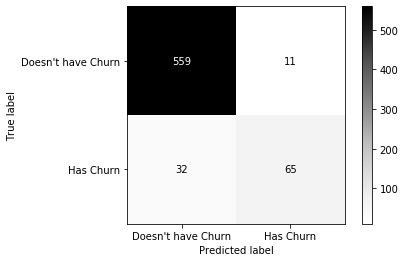

In [229]:
plot_confusion_matrix(model_DT, 
                      X_test, 
                      y_test, 
                      display_labels=["Doesn't have Churn", "Has Churn"],
                      cmap='Greys')
plt.show()

## Classification report

In [230]:
y_pred_DT = model_DT.predict(X_test)

Accuracy:  0.9355322338830585
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       570
           1       0.86      0.67      0.75        97

    accuracy                           0.94       667
   macro avg       0.90      0.83      0.86       667
weighted avg       0.93      0.94      0.93       667



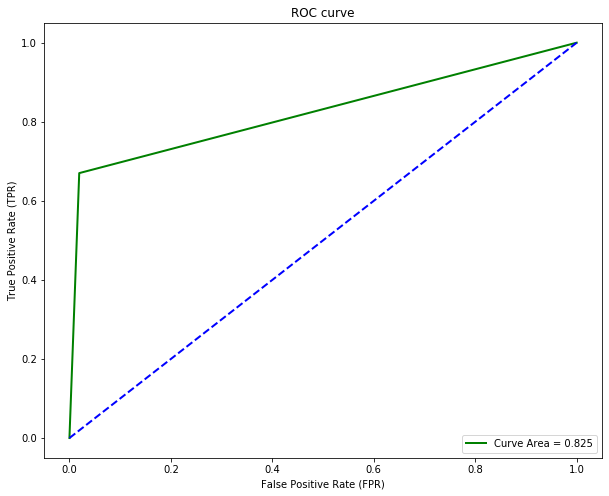

In [231]:
print('Accuracy: ', accuracy_score(y_test, y_pred_DT))

print(classification_report(y_test, y_pred_DT))

fpr, tpr, thr = roc_curve(y_test, model_DT.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, y_pred_DT)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='green', lw=2, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
#print("Precision:",metrics.precision_score(y_test, y_pred, pos_label='Y'))

#### Grid Search and cross-validation

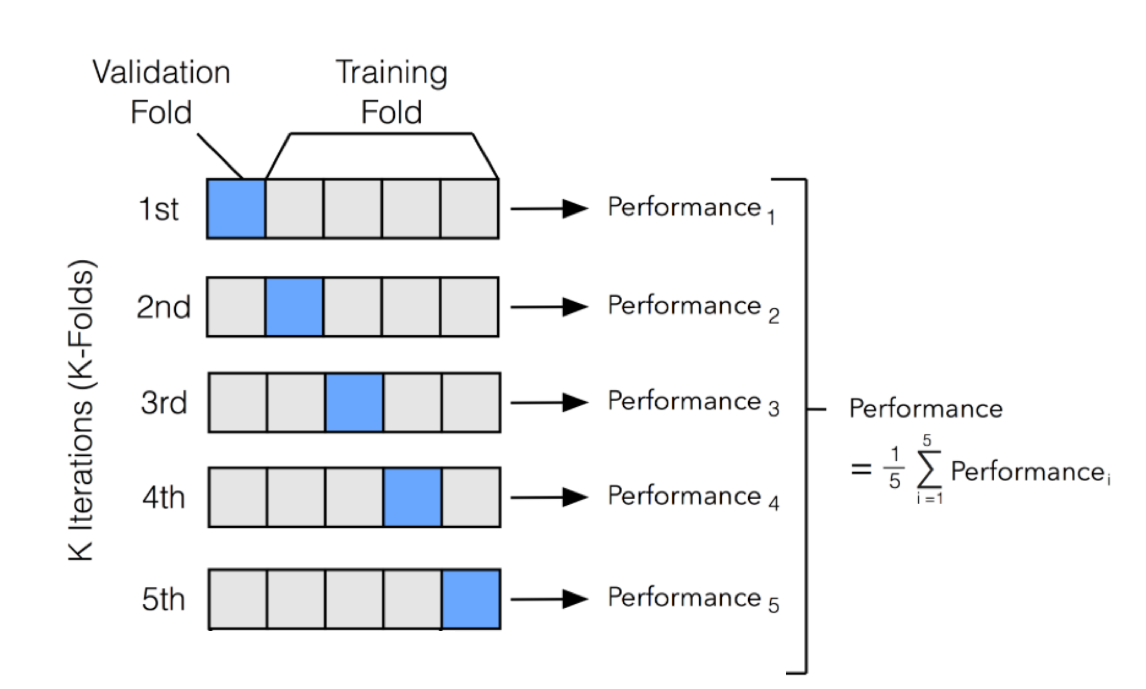
image source: https://www.analyticsvidhya.com/blog/2021/05/importance-of-cross-validation-are-evaluation-metrics-enough/

In [232]:
parameters = {'criterion': ['gini','entropy'],
              'max_depth': [3, 4, 5, 6, 7]}

model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model,
                           param_grid=parameters,
                           scoring="accuracy",
                           cv=5,
                           n_jobs=-1)

# fit the model with the best hyper-parameters
grid_result = grid_search.fit(X_train, y_train)

#### hyperparameters for grid search in each iteration
- iteration 1: criterion='gini', max_depth=3
- iteration 2: criterion='gini', max_depth=4
- iteration 3: criterion='gini', max_depth=5
- iteration 4: criterion='gini', max_depth=6
- iteration 5: criterion='gini', max_depth=7
- iteration 6: criterion='entropy', max_depth=3
- iteration 7: criterion='entropy', max_depth=4
- iteration 8: criterion='entropy', max_depth=5
- iteration 9: criterion='entropy', max_depth=6
- iteration 10: criterion='entropy', max_depth=7

In [233]:
y_pred = np.round(grid_result.predict(X_test), 2)

#### Best hyperparameters in the grid search

In [234]:
grid_result.best_params_

{'criterion': 'entropy', 'max_depth': 7}

In [235]:
cv_result = pd.DataFrame(grid_result.cv_results_)
cv_result = cv_result[['param_criterion', 'param_max_depth',
                       'split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

,param_criterion,param_max_depth,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,entropy,7,0.947566,0.947467,0.956848,0.947467,0.943715,0.948613,0.004371,1
4,gini,7,0.934457,0.949343,0.956848,0.947467,0.945591,0.946741,0.007234,2
3,gini,6,0.936330,0.945591,0.953096,0.949343,0.947467,0.946365,0.005598,3
8,entropy,6,0.943820,0.938086,0.958724,0.949343,0.939962,0.945987,0.007442,4
7,entropy,5,0.932584,0.939962,0.951220,0.945591,0.943715,0.942614,0.006193,5
2,gini,5,0.925094,0.943715,0.947467,0.953096,0.941839,0.942242,0.009397,6
1,gini,4,0.925094,0.932458,0.924953,0.932458,0.917448,0.926482,0.005609,7
6,entropy,4,0.923221,0.926829,0.924953,0.932458,0.917448,0.924982,0.004882,8
0,gini,3,0.898876,0.919325,0.904315,0.904315,0.904315,0.906229,0.006878,9
5,entropy,3,0.898876,0.881801,0.904315,0.906191,0.904315,0.899100,0.008989,10


Index(['param_criterion', 'param_max_depth', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


## Label Encoding

In [236]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['Churn']= label_encoder.fit_transform(df['Churn'])
 
df['Churn'].unique()

array([0, 1])

## Confusion Matrix

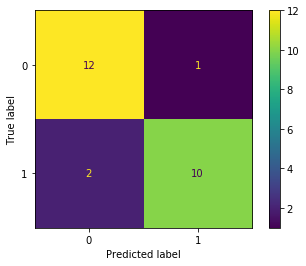

In [237]:
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [243]:
confusion_matrix_dt = confusion_matrix(y_test, y_pred)
print('confusion_matrix: \n', confusion_matrix_dt)

print('Accuracy: ', accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [25, 667]

## ROC: Receiver Operating Characterisitcs and AUC: Area Under the Curve

In [241]:
fpr, tpr, thr = roc_curve(y_test['Churn'], 
                          y_test['probability'])
auc = np.round(roc_auc_score(y_test['Churn'], 
                             y_test['predicted_Churn']), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

## Model performance evaluation with the best found model in grid search and cross-validation

In [238]:
plot_confusion_matrix(grid_result, 
                      X_test, 
                      y_test, 
                      display_labels=["Doesn't have Churn", "Has Churn"],
                      cmap='Greys')
plt.show()

ValueError: X has 20 features, but DecisionTreeClassifier is expecting 3400 features as input.

In [240]:
fpr, tpr, thr = roc_curve(y_test, grid_result.predict_proba(X_test)[:,1])
auc = np.round(roc_auc_score(y_test, y_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

ValueError: X has 20 features, but DecisionTreeClassifier is expecting 3400 features as input.